# Author - Babita Rawat

## Data Science & Business Analytics Intern at [The Sparks Foundation](https://www.linkedin.com/company/the-sparks-foundation/mycompany/)

## Task3 : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

## Objective : As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?

### About Dataset

The given dataset has 13 columns and dataset is [Sample Superstore](https://bit.ly/3i4rbWl)

### Importing Required Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [82]:
df=pd.read_csv('SampleSuperstore.csv')
print('The dataset has imported successfully!!')

The dataset has imported successfully!!


In [83]:
pd.set_option('max_columns',None)
# It will display all columns of the dataframe
df.head()
# It will show top 5 columns of the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [84]:
df.shape

(9994, 13)

We can see that there are 9994 rows and 13 columns in our dataset.

In [85]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [86]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


It is telling us the basic information about all the columns

In [87]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see that there are no null values.

In [88]:
df.nunique()
# this function gives the total no. of unique values in each columns of our data set

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

We are analysing the profit of one country 'United States' which has 531 cities, 49 states, and 4 regions and the profit we are making by selling things which has 4 category and 17 subcategory.

In [89]:
df.duplicated().sum()
# It will total no. of duplicate values.

17

In [90]:
df.drop_duplicates(inplace=True)
#It will drop all duplicate values 
df.shape

(9977, 13)

We can see that our rows has been reduced from 9994 to 9977.

In [91]:
df.drop(['Postal Code'],axis=1,inplace=True)
#we are dropping irrelevent column
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [92]:
df.corr()
# It will find the correlation between the columns who are numerical in nature

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [93]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


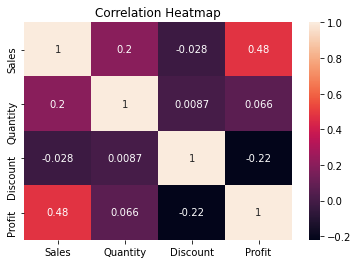

In [94]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='rocket')
# for better visualization we are using heatmap
plt.title('Correlation Heatmap')
plt.show()

We can see that Sales and profit are moderately correlated, discount and profit are Negatively Correlated, Quantity and profit are less correlated.

### ShipMode wise Analysis

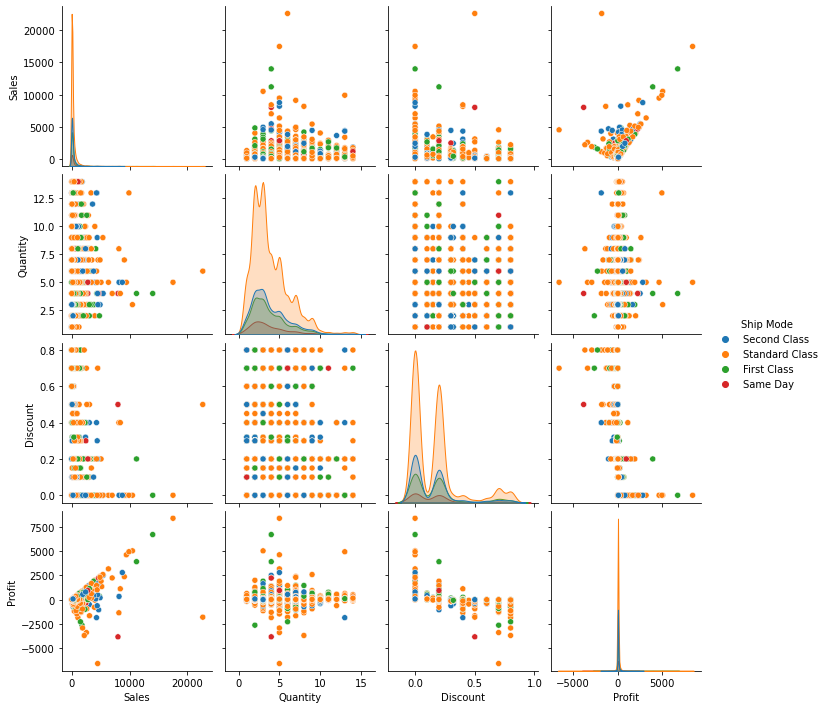

In [95]:
sns.pairplot(df,hue="Ship Mode")

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

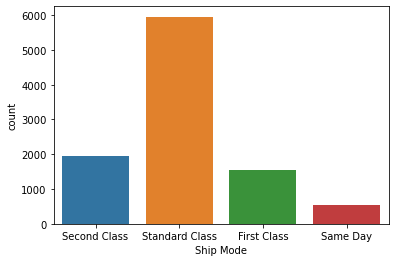

In [96]:
sns.countplot(x=df['Ship Mode'])

We can see that the ship mode is mostly of second class

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

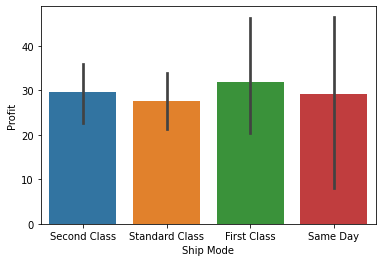

In [97]:
sns.barplot(x=df['Ship Mode'],y=df['Profit'])

First class Ship Mode has made more profit than others and Standard Class made much less profit than others.

### Segment Wise Analysis

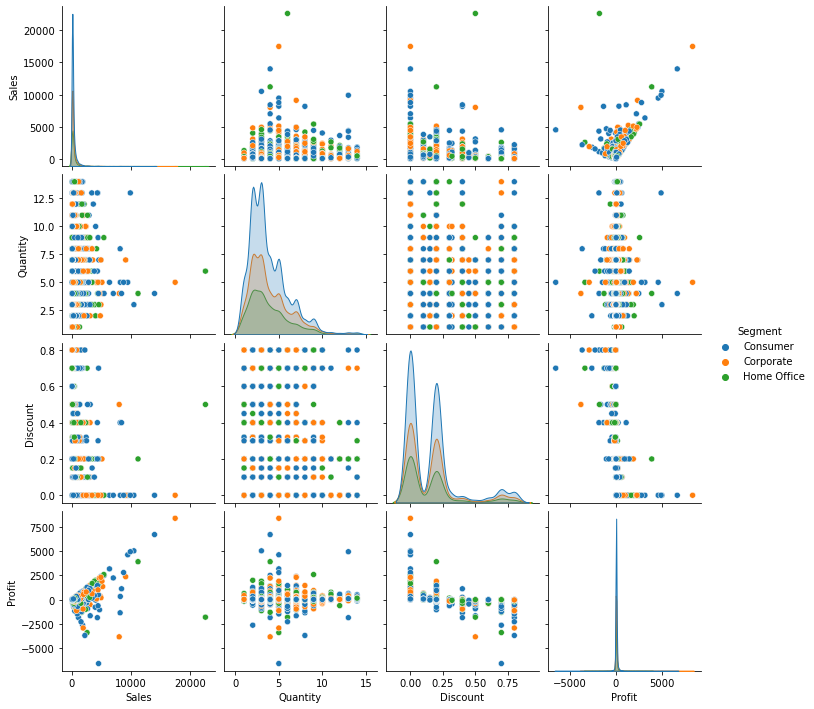

In [98]:
# plotting Pair Plot
sns.pairplot(df,hue='Segment')

<AxesSubplot:xlabel='Segment', ylabel='count'>

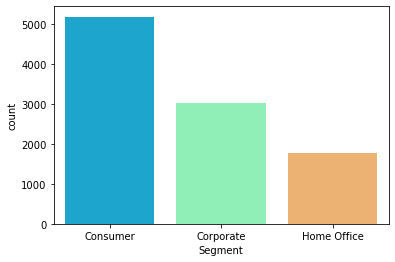

In [99]:
sns.countplot(x='Segment',data=df,palette='rainbow')

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

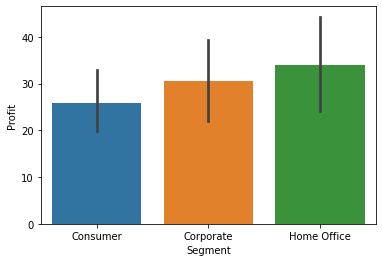

In [100]:
sns.barplot(x=df['Segment'],y=df['Profit'])

Home Office made the most profit and Consumer made less profit even though no of consumer very much more than the other Segments.

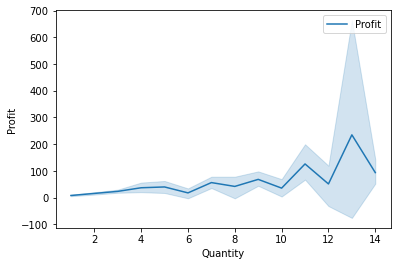

In [101]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

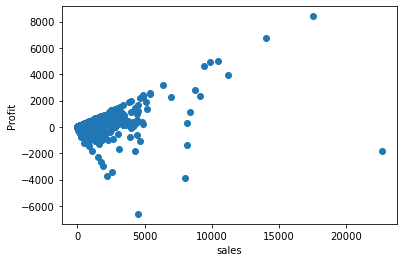

In [102]:
fig,ax=plt.subplots()
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('sales')
ax.set_ylabel('Profit')
plt.show()

### CATEGORY WISE ANALYSIS

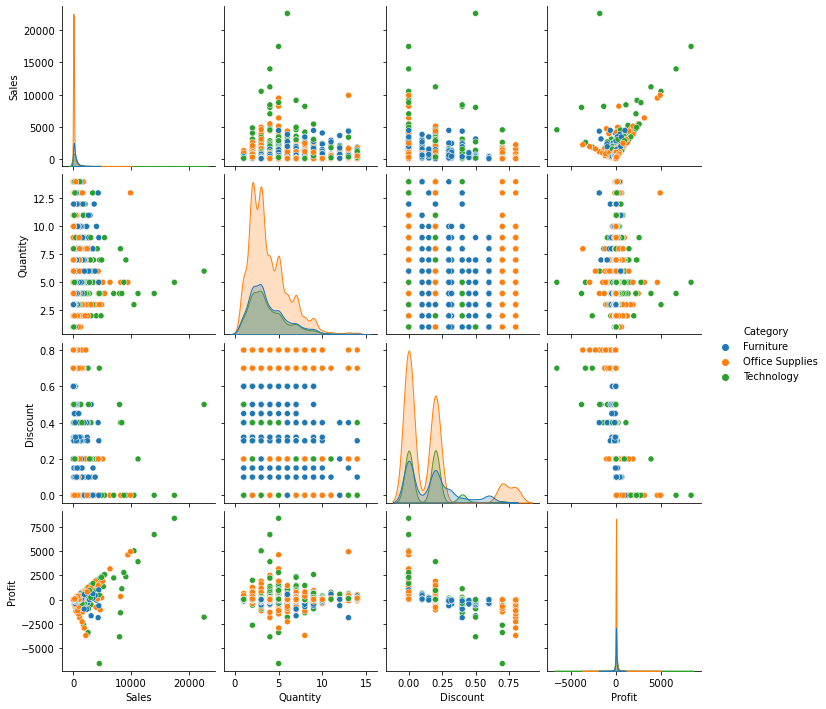

In [103]:
sns.pairplot(df,hue='Category')

<AxesSubplot:xlabel='Category', ylabel='count'>

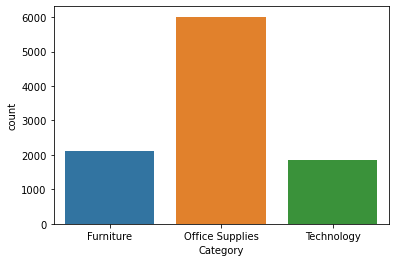

In [104]:
sns.countplot(x='Category',data=df,palette='tab10')

<AxesSubplot:xlabel='Category', ylabel='Profit'>

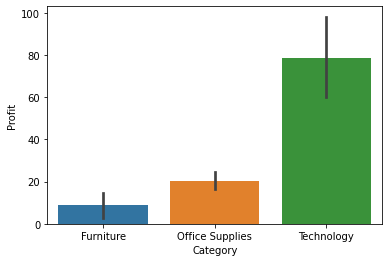

In [105]:
sns.barplot(x=df['Category'],y=df['Profit'])

Technology Category made the most Profit around 80% than others and furniture made very less profit around 10%.

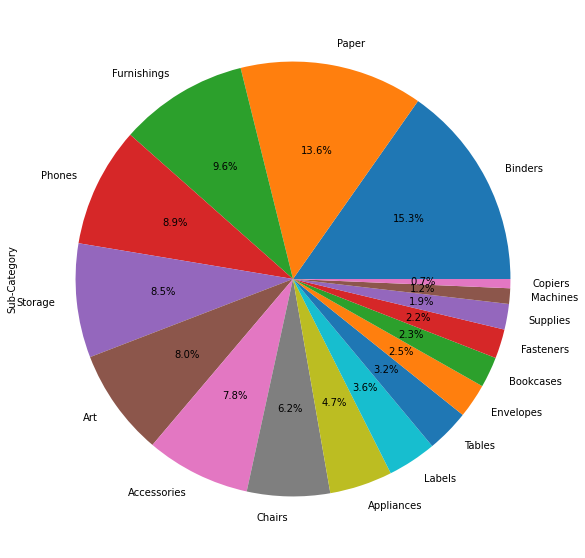

In [106]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

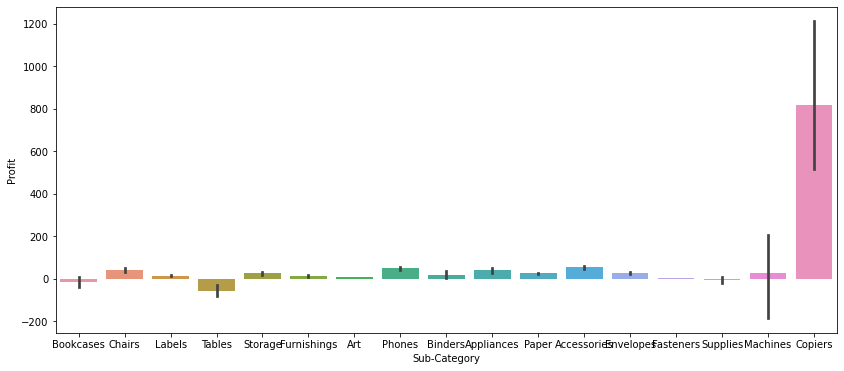

In [107]:
plt.figure(figsize=(14,6))
sns.barplot(x=df['Sub-Category'],y=df['Profit'])

Maximum Profit is made by Copiers and less is made by Tables.

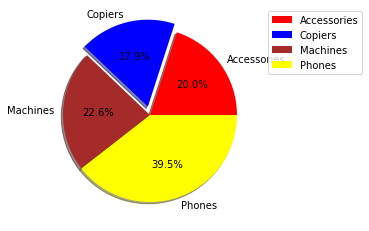

In [108]:
#grouping subcategory under technology
tech = df[df['Category']=='Technology'].groupby(by='Sub-Category').sum()

#plotting pie chart
plt.figure()
plt.pie(x=tech['Sales'],labels=tech.index,shadow=True,colors=['red','blue','brown','yellow'],explode=[0,0.1,0,0],
       autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

Copiers have the least sale, yet they earn maximum profits. Increasing the sale of the copiers would result in more profits.

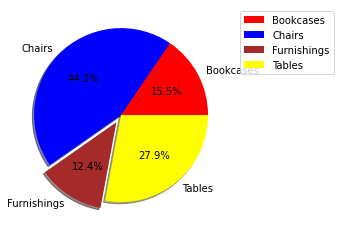

In [109]:
#grouping subcategory under furniture
furniture = df[df['Category']=='Furniture'].groupby(by='Sub-Category').sum()

#plotting pie chart
plt.figure()
plt.pie(x=furniture['Sales'],labels=furniture.index,shadow=True,colors=['red','blue','brown','yellow'],explode=[0,0,0.1,0],
       autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

Furnishings have least sale, increasing the sale quantity would earn more profits. Tables selling price should be increased to provide profits.

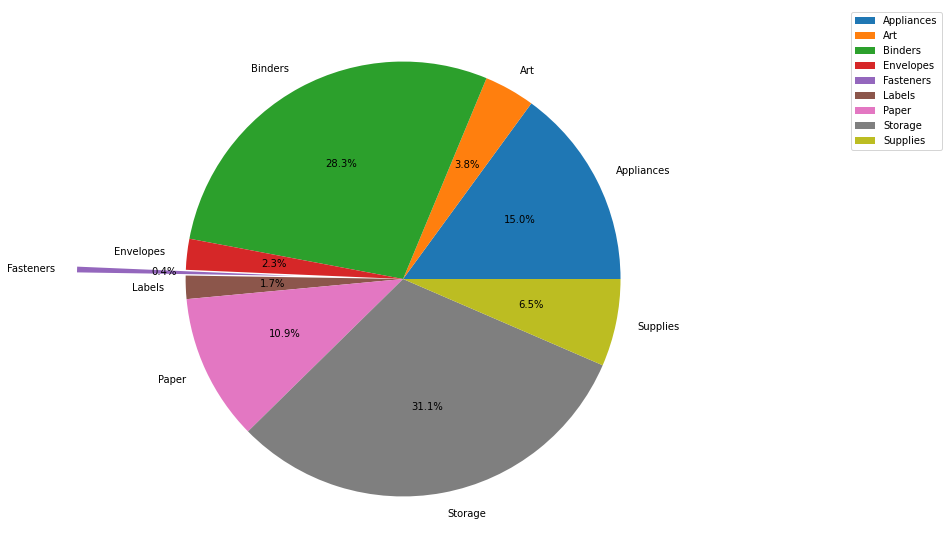

In [110]:
#grouping subcategory under office suplies
ofs = df[df['Category']=='Office Supplies'].groupby(by='Sub-Category').sum()
#plotting pie chart
plt.figure(figsize=(15,10))
plt.pie(x=ofs['Sales'],labels=ofs.index,explode=[0,0,0,0,0.5,0,0,0,0],autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

Fasteners are least liked office product and has the minimum sales. The price of supplies should be increase for greater profits.

### REGION WISE ANALYSIS

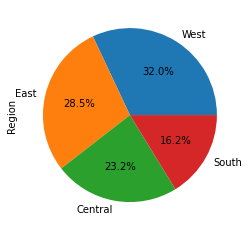

In [111]:
df["Region"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Region', ylabel='Profit'>

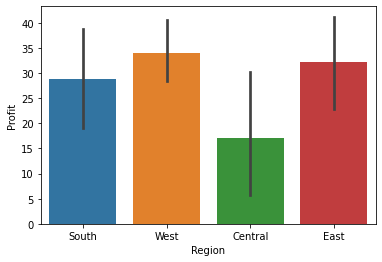

In [112]:
sns.barplot(x=df['Region'],y=df['Profit'])

West Region made the most profit and Central made the less Profit. 

### STATE WISE ANALYSIS

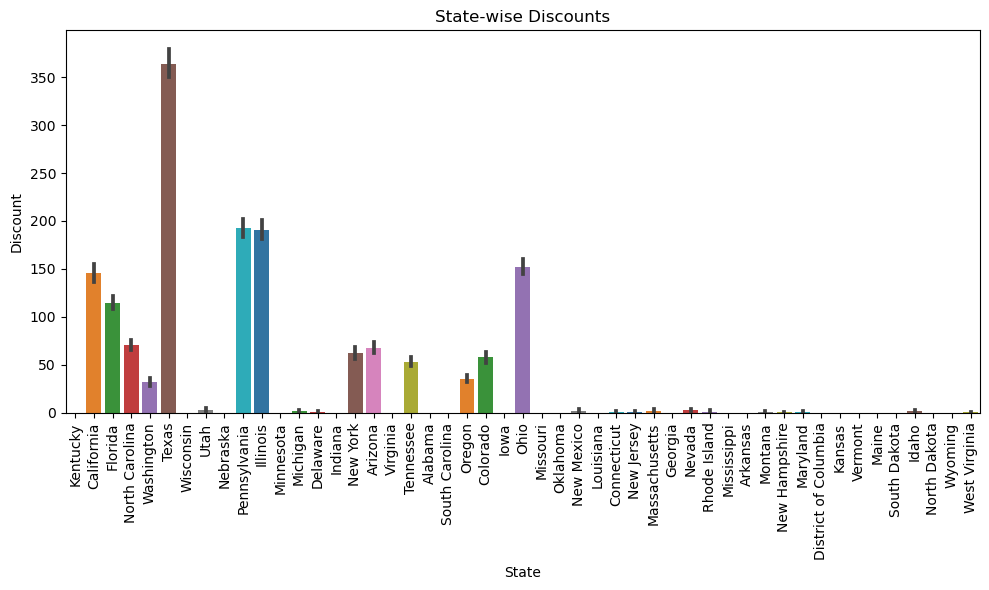

In [113]:
#state-wise discounts
plt.figure(dpi=100,figsize=(10,6))
sns.barplot(x='State',y='Discount',data=df,estimator=np.sum,palette='tab10')
plt.title('State-wise Discounts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

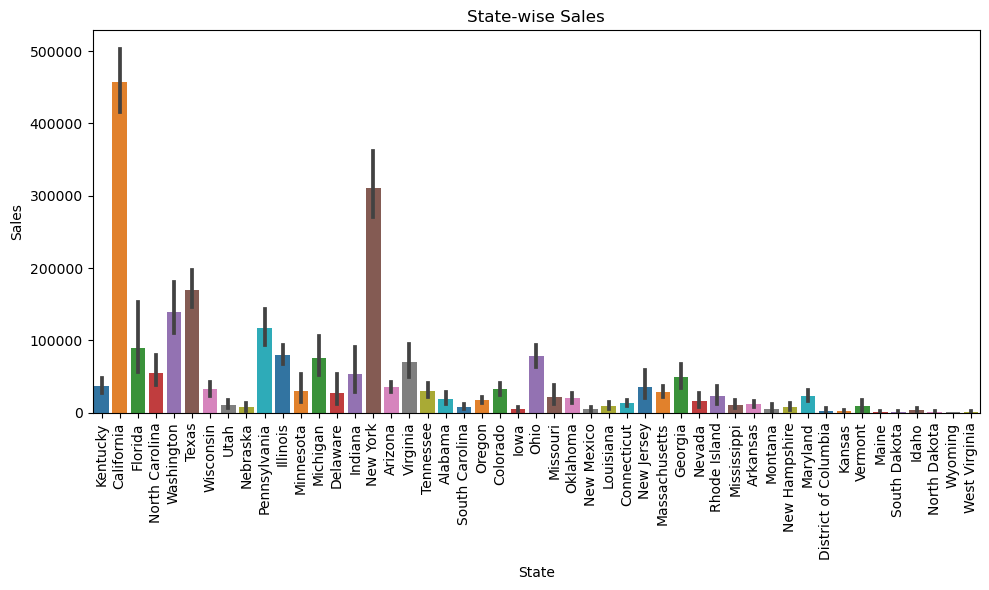

In [114]:
#state-wise sales
plt.figure(dpi=100,figsize=(10,6))
sns.barplot(x='State',y='Sales',data=df,estimator=np.sum,palette='tab10')
plt.title('State-wise Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

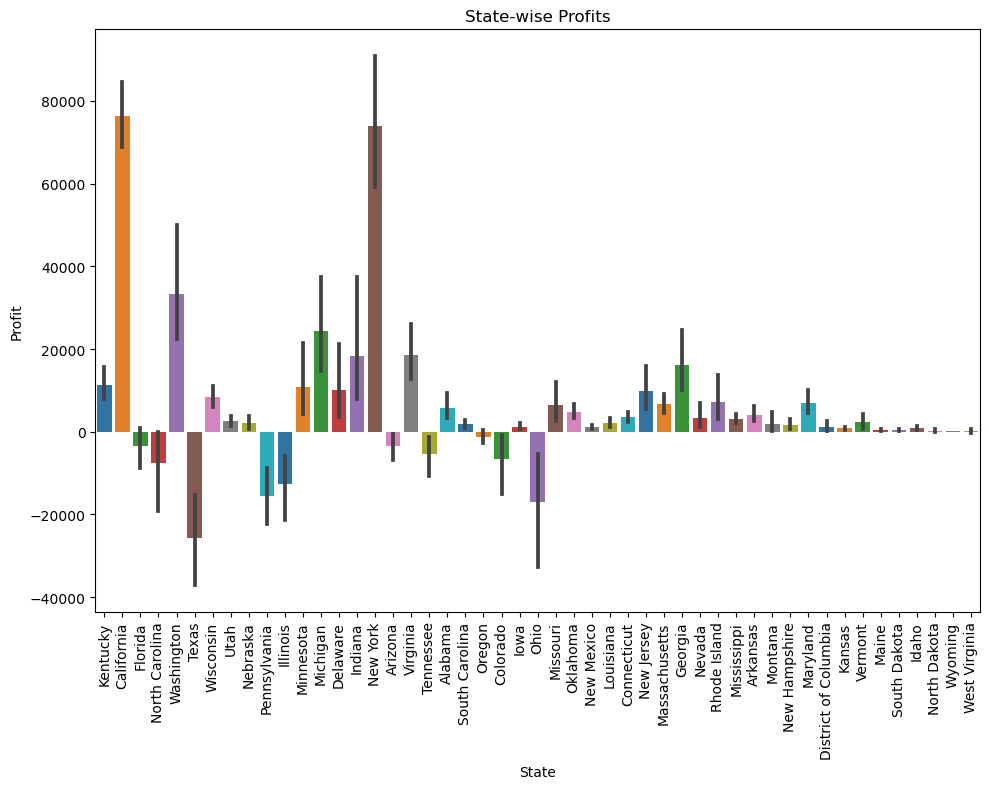

In [115]:
#state-wise profits
plt.figure(dpi=100,figsize=(10,8))
sns.barplot(x='State',y='Profit',data=df,estimator=np.sum,palette='tab10')
plt.title('State-wise Profits')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


__OBSERVATION -__ discount should be given according to the sale demand to make profits.

- TEXAS offers maximum discount but the sales are less and thus ends up in losses.
- New York, California has the maximum sales and offers a little discount making large profits.
- States such as West Virginia offers no discount and ends up in losses.

### City Wise Analysis

In [116]:
city = df.groupby(by='City').sum().sort_values('Profit')

#top 5 cities with losses
city.head()

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,109061.4610,1978,175.30,-13843.2106
Houston,64441.2564,1460,142.74,-10175.1755
San Antonio,21843.5280,247,22.60,-7299.0502
Lancaster,9891.4640,171,14.50,-7239.0684
Chicago,48535.9770,1129,119.70,-6648.3318


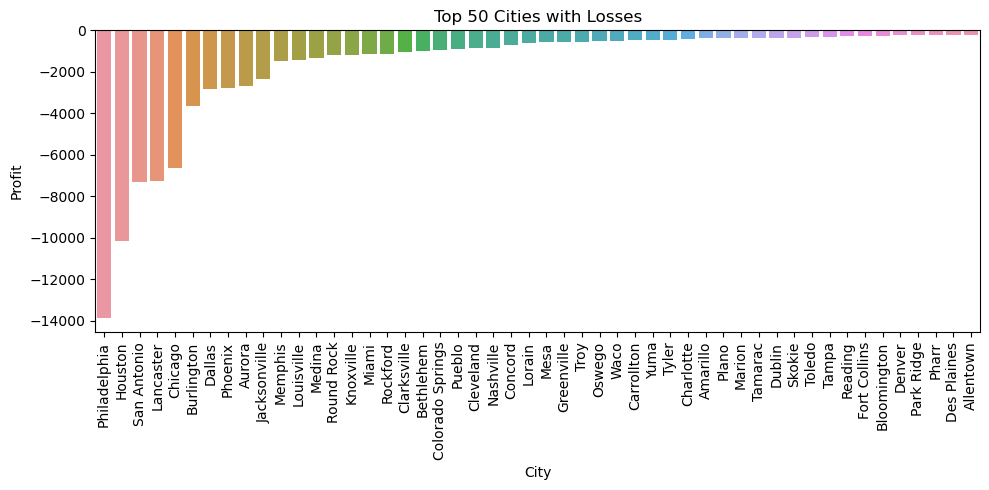

In [117]:
#loss
main_loss = city.reset_index().head(50)
plt.figure(dpi=100,figsize=(10,5))
sns.barplot(x='City',y='Profit',data=main_loss)
plt.xticks(rotation=90)
plt.title('Top 50 Cities with Losses')
plt.tight_layout()
plt.show()

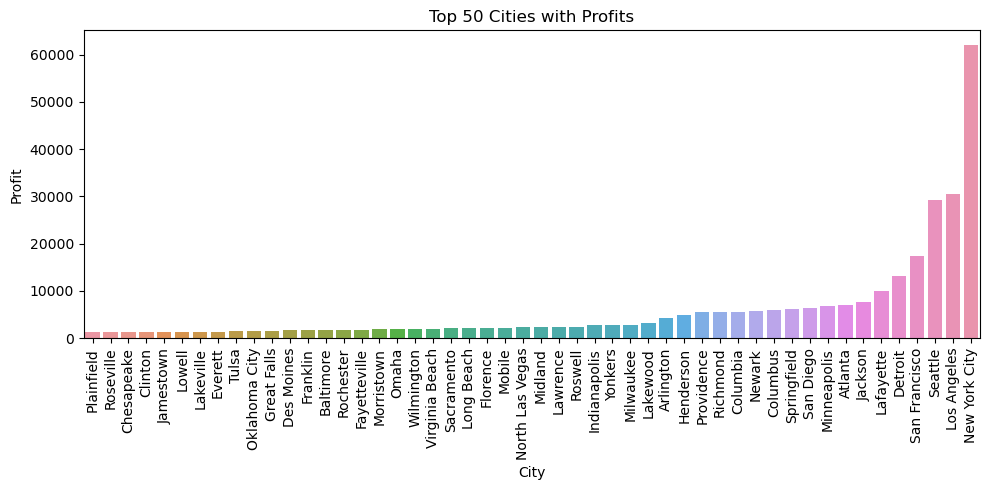

In [118]:
#profit
main_prof = city.reset_index().tail(50)
plt.figure(dpi=100,figsize=(10,5))
sns.barplot(x='City',y='Profit',data=main_prof)
plt.xticks(rotation=90)
plt.title('Top 50 Cities with Profits')
plt.tight_layout()
plt.show()

Philedephia suffers maximum losses and New York city earns maximum profits.

__OBSERVATIONS__:
- We have 3 weak areas Bookcases,Supplies and Tables as we are facing loss on the sales of these items. On the sales of tables we are facing highest loss.
- Least sales are in southern region, we can offer them more discount. 
- Sales and profit are more in Standard class.
- Profits and Sales are in maximum in West Region and minimum in south region.
- No correlation between profit and discount.
- highest no. of buyers are from New york and California.

__CONCLUSIONS__ :
__The Weak ares where one can work to make more profit are__ :
- The increase in sales in the furniture will not affect the profit, but increasing the prize value will, and maintaing the optimum sales in every reagion is the must for better profit.
- We should limit the sales of furniture and increase that of office supplies and technology as it is generating very less profit as compared to its sales.
- In the sub-categories we are facing huge loss on tables so that should be minimized.
- The sales and profit in Southern and Central region are less so we should give more incentives like discount in order to increase sales, hence profit will increase.
- The percentage of discount offered should not be more than 25%, otherwise loss is faced.
- Few states like North dakota, Wyoming and West virgina have less or no sales at all so we also need to focus on these states.

# Thank You!